In [176]:
import traceback
import urllib3
urllib3.disable_warnings()
import xmltodict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.animation as animation
import imageio

year = 2020
number_days = 20


def getxml():
    url = "http://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/XmlView.aspx?data=yieldyear&year=" + str(
        year)
    http = urllib3.PoolManager()
    response = http.request('GET', url)

    try:
        data = xmltodict.parse(response.data)
    except:
        print("Failed to parse xml from response (%s)" %
              traceback.format_exc())
    return data


yieldcurve = getxml()

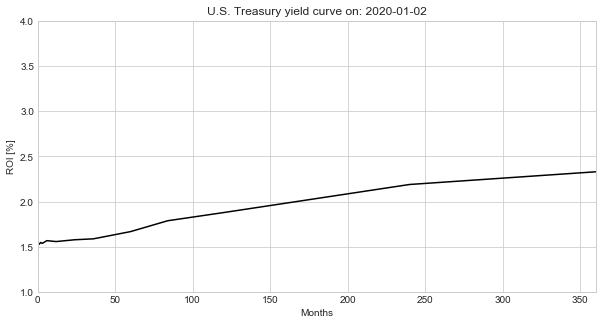

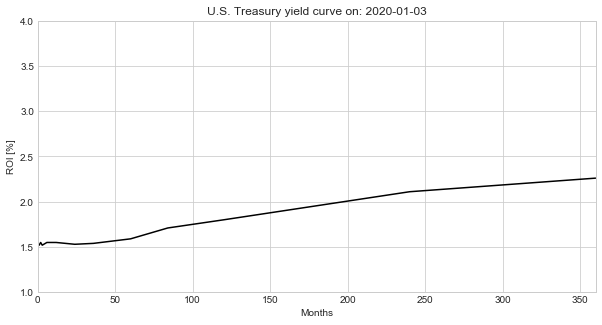

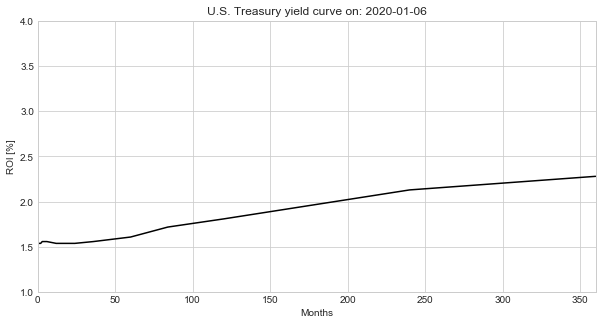

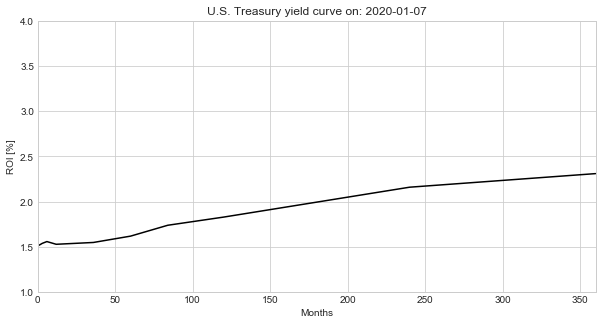

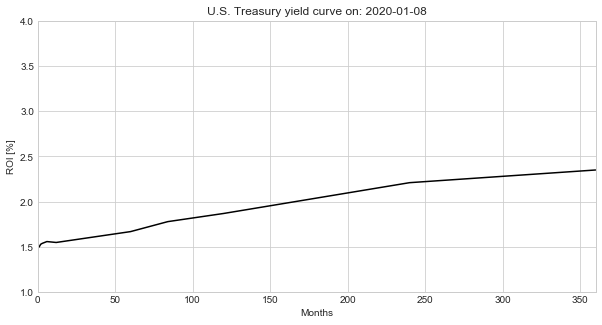

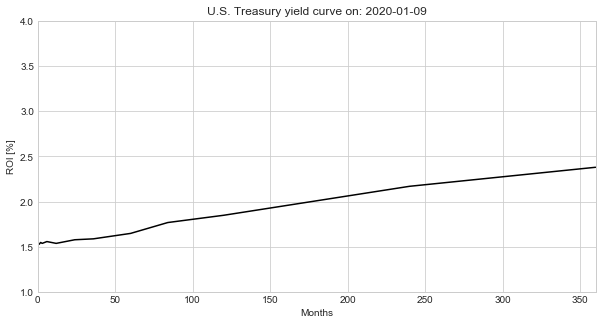

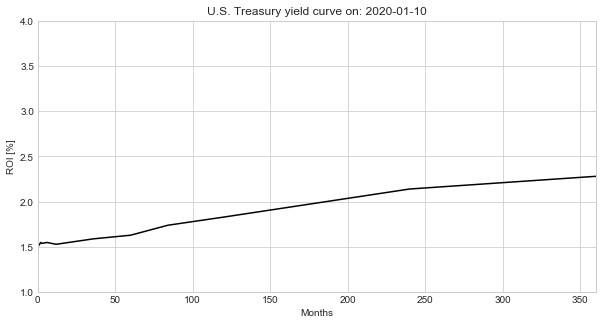

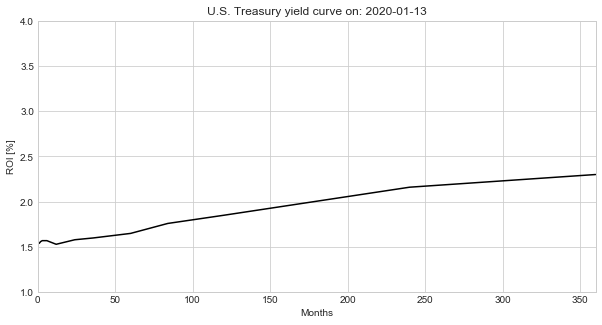

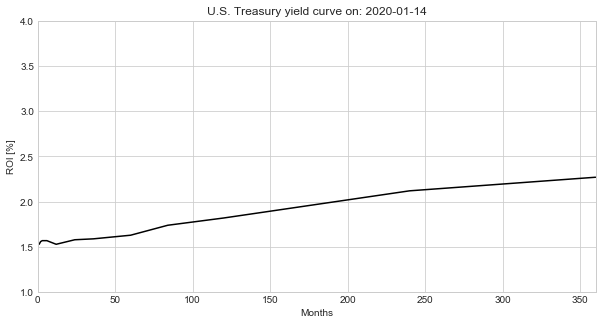

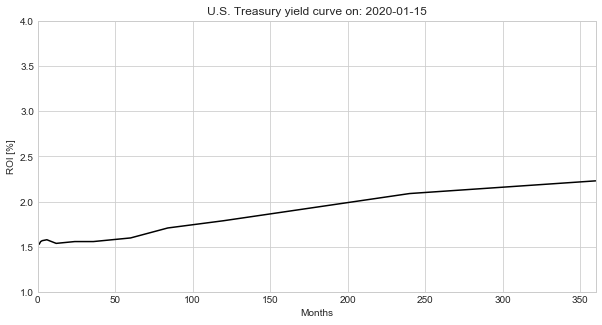

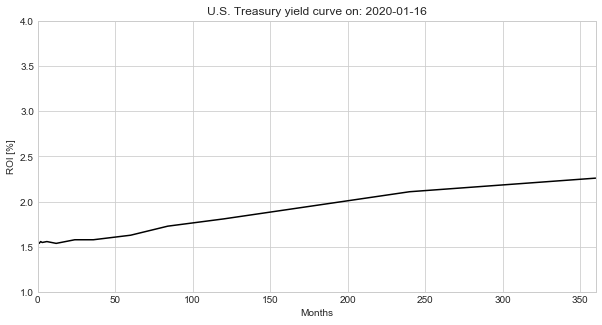

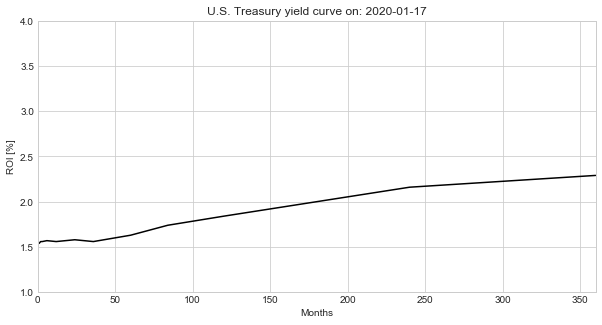

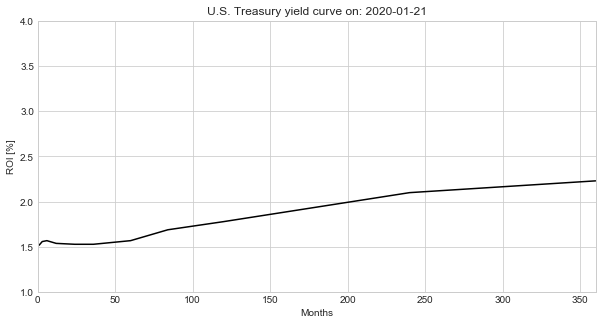

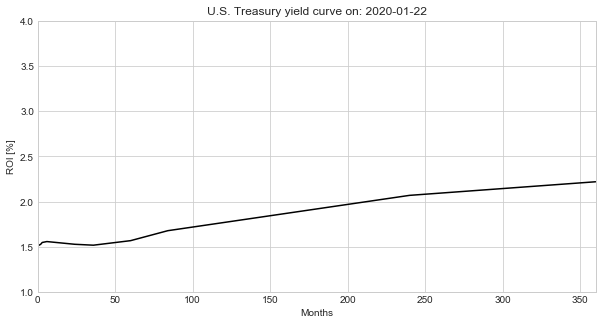

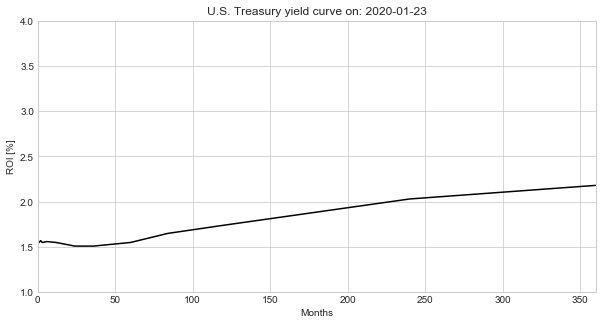

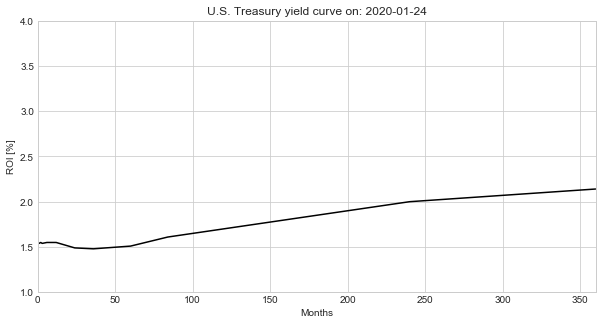

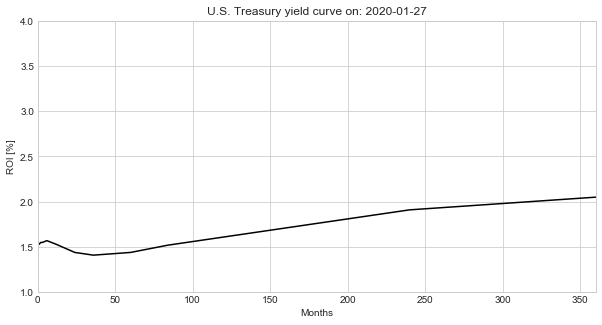

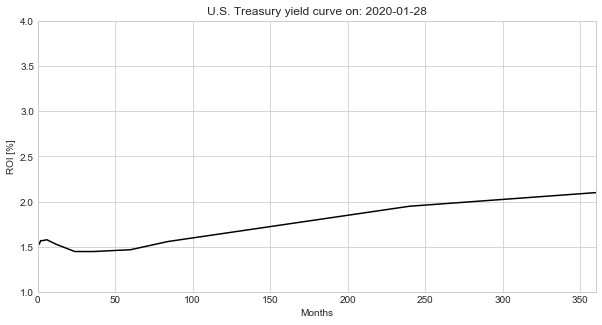

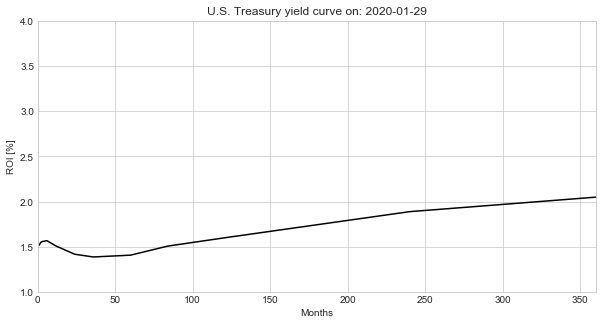

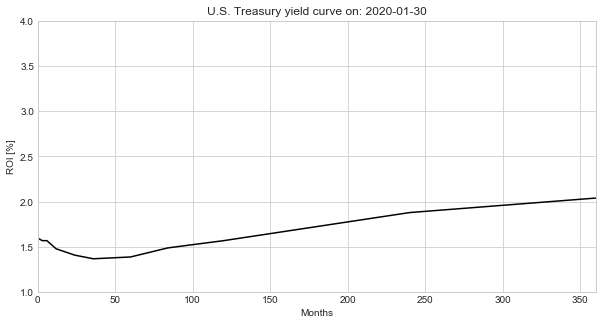

In [177]:
months_string = [
    'd:BC_1MONTH', 'd:BC_2MONTH', 'd:BC_3MONTH', 'd:BC_6MONTH', 'd:BC_1YEAR',
    'd:BC_2YEAR', 'd:BC_3YEAR', 'd:BC_5YEAR', 'd:BC_7YEAR', 'd:BC_10YEAR',
    'd:BC_20YEAR', 'd:BC_30YEAR'
]

months = [
    1, 2, 3, 6, 12, 12 * 2, 12 * 3, 12 * 5, 7 * 12, 10 * 12, 20 * 12, 30 * 12
]

def get_data(day, months):

    vals = []
    time = "0"

    for i in months_string:
        try:
            string = yieldcurve['pre']['entry'][day]['content'][
                'm:properties'][i]['#text']
            time = yieldcurve['pre']['entry'][day]['content']['m:properties'][
                'd:NEW_DATE']['#text'][:10]
            vals.append(float(string))

        except:
            print("The day", day, "doesn't exist in the data.")
    image = plot_image(months, vals, time)
    return image

def plot_image(months, vals, time):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(months, vals, '-', color='black')
    ax.set_ylim(1, 4)
    ax.set_xlim(0, 360)
    ax.set_title("U.S. Treasury yield curve on: " + time)
    ax.set_xlabel("Months")
    ax.set_ylabel("ROI [%]")
    #ax.set_xticks(months, months_string_plot)
    #ax.plot()

    # Used to return the plot as an image rray
    fig.canvas.draw()  # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3, ))
    return image


#get_data(0, months)
#plot_image(months, vals, time)

kwargs_write = {'fps': 1.0, 'quantizer': 'nq'}
imageio.mimsave('./yield_curve_' + str(year) + '.gif',
                [get_data(i, months) for i in range(number_days)],
                fps=10)